# Stream File Generation

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sb
from matplotlib import pyplot as plt

from ktc_tools import grating_generation as ggen
from ktc_tools import streams as st

In [2]:
hfw = 50 #microns
millDens = 100  # points per micron

<Axes: >

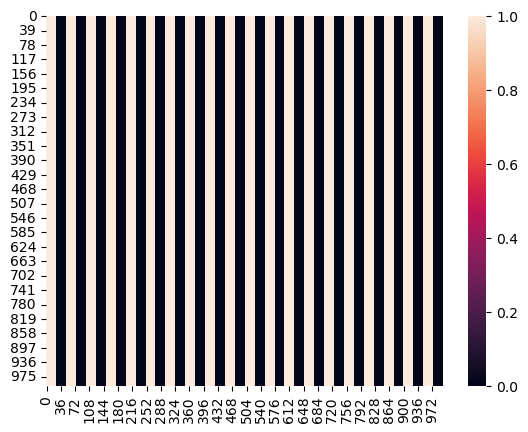

In [3]:
#first step is to import the grating array from whatever workflow you used to generate it
testPeriod = .3 #use a period of 300 microns for the test
nTest = 1000
testSizeHorz = 6
testSizeVert = 6

xarr, yarr = ggen.generateCoordinates(xLength = testSizeHorz,yLength = testSizeVert, nx = nTest, ny = nTest)
gratingArray = ggen.oneDimensionBinary(xarr,depth=1,period = testPeriod)

sb.heatmap(gratingArray)

In [4]:
millArrDens, lengthStream = st.streamConversions(hfw,millDens,testSizeVert,nTest)
streamArray = st.binaryStreamGen(gratingArray,millArrDens,millArrDens,lengthStream,lengthStream)

streamarr = streamArray

43.1640625
each returned array pixel represents
7.864319999999999 streamfile pixels

mill point spacing values in streamfile pixels
13.1072 

the mill points will be seperated by 
2  pixels in the returned arrays



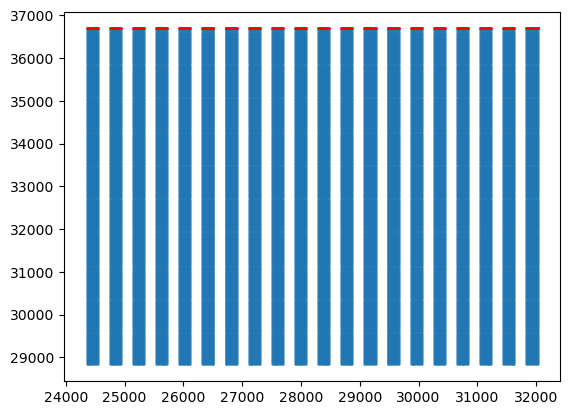

In [5]:
st.plotStreams(streamarr, zoom = False)

In [6]:
passes = 1000
dwellTime = 50 #this corresponds to 5 microseconds
fileLoc = "temp.st"

st.generateStreamFile(streamarr,passes,dwellTime,fileLoc)

##no longer thinking this is necessary
I want to be flexible so here we take the grating array, whatever it's pixel counts are, and we turn that into the pixel counts we desire for streamfile generation. Ideally whoever is making the grating arrays is smart enough to use streamfile-like indexing but who knows. 

# Stream File Parameters

### Indexing
Maximum Number of Pixels \
X-dir: 65536 \
Y-dir: 56576

These numbers are both divisible by powers of 2 up until $2^8$ or 256, this makes powers of 2 the natural step size to use between points since it will allow us to evenly go from a smaller array used for computational generation of streamfiles to an indexing system that utilizes the full range of the FIBs field of view, or ranges that are smaller by a power of 2 up until $2^8$. 

According to James' experiments spacings of approximately 50 streamfile pixels is good so I will use 64 for my point spacing